In [16]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD
from keras.optimizers import adam
from keras.layers import Dense
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping




In [3]:
k=pd.read_csv("dataset-HAR-PUC-Rio.csv",delimiter=";")

C:\Users\giorgospc\AppData\Local\Temp\ipykernel_6964\2729528174.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  k=pd.read_csv("dataset-HAR-PUC-Rio.csv",delimiter=";")


In [4]:
k


,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,jose_carlos,Man,75,"1,67",67,"24,0",2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165629,jose_carlos,Man,75,"1,67",67,"24,0",-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking
165630,jose_carlos,Man,75,"1,67",67,"24,0",-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,walking
165631,jose_carlos,Man,75,"1,67",67,"24,0",-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,walking


In [5]:
df=pd.DataFrame(k,columns=['class'])
df1=pd.DataFrame(k,columns=['gender'])

In [6]:
df

,class
0,sitting
1,sitting
2,sitting
3,sitting
4,sitting
...,...
165628,walking
165629,walking
165630,walking
165631,walking


In [7]:
categorical_movement = {
    'sitting' : 0,
    'sittingdown' : 1,
    'standing' : 2,
    'standingup' : 3,
    'walking' : 4   
}

categorical_gender = {
    'Woman' : 8,
    'Man' : 9
   }
num_cat_mov= df['class'].map(categorical_movement)
num_cat_gen=df1['gender'].map(categorical_gender)
new_df = k.copy()
new_df['num_cat_mov'] = num_cat_mov
new_df['num_cat_gen']=num_cat_gen
new_df['z4'] = pd.to_numeric(new_df['z4'], errors='coerce').fillna(0)
new_df['how_tall_in_meters'] = new_df['how_tall_in_meters'].str.replace(',', '.')
new_df['body_mass_index'] = new_df['body_mass_index'].str.replace(',', '.')


In [8]:
def center(dataframe):
    for column in dataframe.columns[6:18]:
        mean_value = dataframe[column].mean()
        dataframe[column] = dataframe[column] - mean_value
    return dataframe
    

In [9]:
new_order = ['user', 'gender',  'age', 'how_tall_in_meters', 'weight', 'num_cat_gen', 'body_mass_index', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4','z4','class','num_cat_mov']
new_df = new_df.reindex(columns=new_order)

In [10]:
new_df

,user,gender,age,how_tall_in_meters,weight,num_cat_gen,body_mass_index,x1,y1,z1,...,y2,z2,x3,y3,z3,x4,y4,z4,class,num_cat_mov
0,debora,Woman,46,1.62,75,8,28.6,-3,92,-63,...,18,-19,5,104,-92,-150,-103,-147.0,sitting,0
1,debora,Woman,46,1.62,75,8,28.6,-3,94,-64,...,18,-18,-14,104,-90,-149,-104,-145.0,sitting,0
2,debora,Woman,46,1.62,75,8,28.6,-1,97,-61,...,20,-15,-13,104,-90,-151,-104,-144.0,sitting,0
3,debora,Woman,46,1.62,75,8,28.6,-2,96,-57,...,21,-16,-13,104,-89,-153,-103,-142.0,sitting,0
4,debora,Woman,46,1.62,75,8,28.6,-1,96,-61,...,20,-15,-13,104,-89,-153,-104,-143.0,sitting,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,jose_carlos,Man,75,1.67,67,9,24.0,2,93,-148,...,88,-100,15,120,-100,-189,-77,-160.0,walking,4
165629,jose_carlos,Man,75,1.67,67,9,24.0,-1,94,-147,...,87,-99,17,121,-99,-190,-78,-158.0,walking,4
165630,jose_carlos,Man,75,1.67,67,9,24.0,-10,93,-143,...,86,-104,0,114,-101,-185,-80,-153.0,walking,4
165631,jose_carlos,Man,75,1.67,67,9,24.0,-15,86,-152,...,88,-117,-44,155,-25,-185,-84,-156.0,walking,4


In [11]:
target_columns = ['user','gender','class']


j = new_df.drop(target_columns, axis=1)

In [27]:
X = j.iloc[:, :-1]
y = j.iloc[:, -1]


mse_scores = []
ce_scores = []
acc_scores = []

num_folds = 5

# define the KFold object
kfold = KFold(n_splits=num_folds, shuffle=True)

fold = 0

# loop over each fold
for train_index, test_index in kfold.split(X):
    # split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    
    
    # define the model architecture
    optimizer = SGD(learning_rate=0.001)
    early_stopping = EarlyStopping(monitor='loss', patience=5)
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['mse', 'sparse_categorical_crossentropy','accuracy'])
    

    
    # fit the model on the train set
    history=model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, callbacks =[early_stopping])
    mse_score = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
    ce_score = model.evaluate(X_test_scaled, y_test, verbose=0)[2]
    acc_score = model.evaluate(X_test_scaled, y_test, verbose=0)[3]
    mse_scores.append(mse_score)
    ce_scores.append(ce_score)
    acc_scores.append(acc_score)


    fold += 1


Epoch 1/10
2592/4141 [=================>............] - ETA: 1s - loss: 1.0683 - mse: 5.3924 - sparse_categorical_crossentropy: 1.0683 - accuracy: 0.6315

KeyboardInterrupt: 

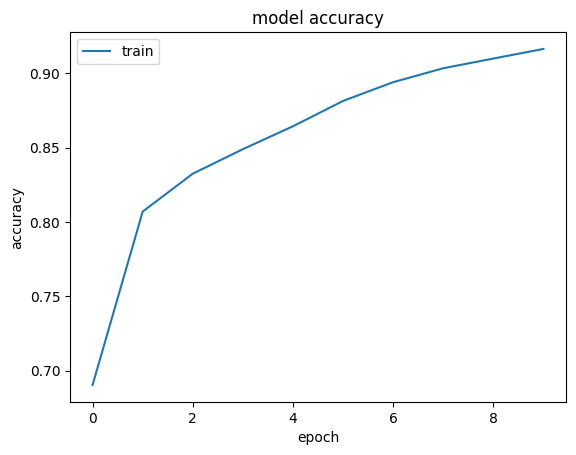

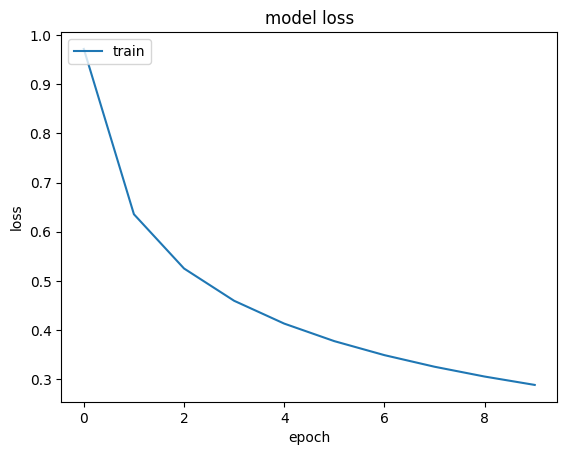

In [13]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
print(np.mean(mse_scores))
print(np.mean(ce_scores))
print(np.mean(acc_scores))


5.470711326599121
0.2760746657848358
0.9211509704589844
